In [32]:
import pandas as pd
import numpy as np

In [33]:
df= pd.read_csv(r"/content/carmpg.csv",na_values="?")

In [34]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,1,"""ford torino"""


# EDD

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [36]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [37]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

In [38]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [39]:
df.dropna(axis=0,inplace=True)

In [40]:
df.drop(["car name"],axis=1,inplace=True)

In [41]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


## Splitting the dataset into training and testing

In [42]:
X= df.drop(["mpg"],axis=1)
y=df["mpg"]

In [43]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1


In [44]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [45]:
X.shape,y.shape

((392, 7), (392,))

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=12)

In [48]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((313, 7), (313,), (79, 7), (79,))

## Normalize the Dataset

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
sc= StandardScaler()

In [51]:
x_train_std = sc.fit_transform(x_train)
x_test_std= sc.transform(x_test)

In [52]:
x_train_std

array([[ 1.46427195,  1.48379476,  1.21117887, ..., -0.91858   ,
        -1.0473706 , -0.68499023],
       [-0.87110191, -1.06419035, -1.38292666, ...,  2.5233757 ,
         0.04904076, -0.68499023],
       [ 0.29658502,  0.51632673, -0.15008443, ...,  0.57792248,
        -0.49916492, -0.68499023],
       ...,
       [-0.87110191, -0.53735132, -0.45829499, ..., -0.02067851,
         0.59724644, -0.68499023],
       [ 1.46427195,  1.47421587,  1.00570517, ..., -0.54445438,
        -0.22506208, -0.68499023],
       [-1.45494537, -1.20787372, -0.15008443, ..., -1.10564281,
         1.14545212,  1.8826977 ]])

In [102]:
import pickle
pickle.dump(sc,open('sc.pkl','wb'))
#sc.save('Standard_scalar.h5')

## Build model and train

In [83]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [84]:
model= Sequential()
model.add(Dense(100,activation='relu',input_shape=[7]))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))


In [85]:
model.compile(loss='mean_squared_error',optimizer='Adam',metrics=['mean_squared_error','mean_absolute_error'])

In [86]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               800       
_________________________________________________________________
dense_9 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 9,377
Trainable params: 9,377
Non-trainable params: 0
_________________________________________________________________


In [87]:
model_history=model.fit(x_train_std,y_train,batch_size=5,epochs=200)

Epoch 1/200
63/63 [==============================] - 0s 2ms/step - loss: 525.7325 - mean_squared_error: 525.7325 - mean_absolute_error: 21.3791
Epoch 2/200
63/63 [==============================] - 0s 2ms/step - loss: 49.7563 - mean_squared_error: 49.7563 - mean_absolute_error: 5.9465
Epoch 3/200
63/63 [==============================] - 0s 2ms/step - loss: 17.4050 - mean_squared_error: 17.4050 - mean_absolute_error: 3.2615
Epoch 4/200
63/63 [==============================] - 0s 2ms/step - loss: 14.7702 - mean_squared_error: 14.7702 - mean_absolute_error: 2.8932
Epoch 5/200
63/63 [==============================] - 0s 2ms/step - loss: 10.3276 - mean_squared_error: 10.3276 - mean_absolute_error: 2.4031
Epoch 6/200
63/63 [==============================] - 0s 2ms/step - loss: 11.3349 - mean_squared_error: 11.3349 - mean_absolute_error: 2.4411
Epoch 7/200
63/63 [==============================] - 0s 2ms/step - loss: 8.1880 - mean_squared_error: 8.1880 - mean_absolute_error: 2.2206
Epoch 8/200


## Evaluating the model

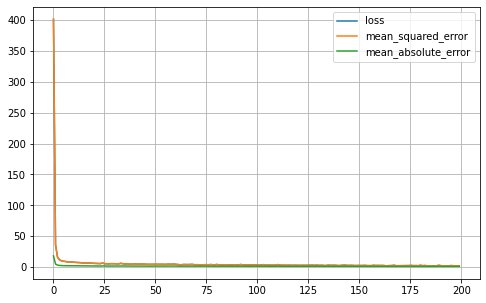

In [88]:
import matplotlib.pyplot as plt
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
#plt.gca().set_ylim(0,1)
plt.show()

In [89]:
mae= model.evaluate(x_train_std,y_train)

10/10 [==============================] - 0s 2ms/step - loss: 1.8993 - mean_squared_error: 1.8993 - mean_absolute_error: 1.0176


In [90]:
model.evaluate(x_test_std,y_test)

3/3 [==============================] - 0s 3ms/step - loss: 14.3057 - mean_squared_error: 14.3057 - mean_absolute_error: 2.4320


[14.30569076538086, 14.30569076538086, 2.4320449829101562]

In [91]:
prediction=model.predict(x_test_std)

In [92]:
from sklearn.metrics import r2_score

In [93]:
r2_score(y_test,prediction)

0.7896564518650249

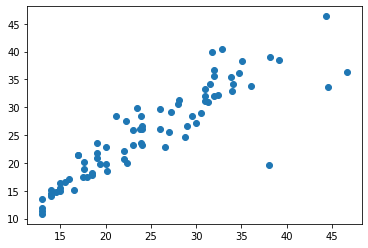

In [94]:
import matplotlib.pyplot as plt
plt.scatter(y_test,prediction)
plt.show()

Text(0, 0.5, 'Prediction')

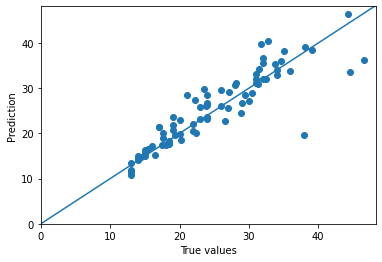

In [95]:
plt.scatter(y_test,prediction)
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-100,100],[-100,100])
plt.xlabel("True values")
plt.ylabel("Prediction")

In [96]:
int(model.predict(sc.transform([[8,350,165,3693,11.5,70,1]])))

16

## Save the model

In [98]:
model.save('model.h5')